# Data cleaning and exploratory analysis

## First look at data set

In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Regex for string matching
from re import match

In [2]:
# Import data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

all_data = [train, test]

Let's get a look at the data:

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.iloc[179]

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                             36
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                             0
Cabin                          NaN
Embarked                         S
Name: 179, dtype: object

Summary of the data;

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Check that the test data contains the same information:

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Contains all the same information, except survival (as we expect).

## Quick cleaning

The PassengerId doesn't give any information so I'll drop it

In [7]:
train = train.drop(columns = 'PassengerId')
test = test.drop(columns = 'PassengerId')

Move 'Survived' column in train to the far right:

In [8]:
# Move 'Survived' to far right in train
train['survived'] = train['Survived']
train = train.drop(columns = 'Survived')

Make column names snake_case:

In [9]:
# Make column names snake_case
col_names = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']

train.columns = col_names + ['survived']
test.columns = col_names

## Inspecting variables

In [74]:
def percentage_counts(Series):
    'returns same as Series.value_counts() but with percentages of total in place of counts'
    return (100 * Series.value_counts() / len(Series)).round(1)

### pclass

In [71]:
# Counts of each value
train.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [75]:
percentage_counts(train.pclass)

3    55.1
1    24.2
2    20.7
Name: pclass, dtype: float64

### name

In [68]:
train.name.nunique()

891

In [73]:
train.name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

### sex

In [11]:
train.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [76]:
percentage_counts(train.sex)

male      64.8
female    35.2
Name: sex, dtype: float64

### age

In [12]:
train.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Ages are fractional if < 1. Note that 177 ages are missing.

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


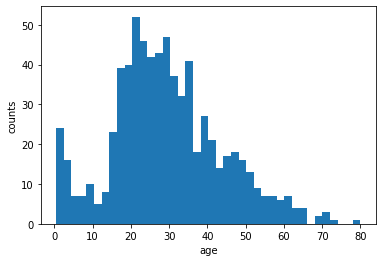

In [13]:
# Plot histogram of ages
plt.figure()

# Histogram of last review date for unavailable properties
plt.hist(train.age, bins = 40)

plt.xlabel('age')
plt.ylabel('counts')

plt.show()
plt.close()

### sibsp and parch

In [14]:
train[['sibsp', 'parch']].describe()

,sibsp,parch
count,891.000000,891.000000
mean,0.523008,0.381594
std,1.102743,0.806057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,8.000000,6.000000


In [15]:
train.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [78]:
percentage_counts(train.sibsp)

0    68.2
1    23.5
2     3.1
4     2.0
3     1.8
8     0.8
5     0.6
Name: sibsp, dtype: float64

In [16]:
train.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [80]:
percentage_counts(train.parch)

0    76.1
1    13.2
2     9.0
5     0.6
3     0.6
4     0.4
6     0.1
Name: parch, dtype: float64

### ticket

#### Value counts

In [17]:
train.ticket.nunique()

681

All passengers have tickets, but only 681 of these are unique.

In [81]:
ticket_value_counts = train.ticket.value_counts()
len(ticket_value_counts[ticket_value_counts == 1])

In [82]:
ticket_value_counts

347082           7
CA. 2343         7
1601             7
347088           6
3101295          6
CA 2144          6
S.O.C. 14879     5
382652           5
347077           4
4133             4
LINE             4
17421            4
2666             4
W./C. 6608       4
113760           4
113781           4
19950            4
349909           4
PC 17757         4
345773           3
PC 17582         3
347742           3
C.A. 34651       3
363291           3
239853           3
PC 17755         3
C.A. 31921       3
SC/Paris 2123    3
110152           3
248727           3
                ..
3101281          1
315151           1
347071           1
364500           1
4134             1
315037           1
349234           1
239856           1
2672             1
349257           1
111428           1
A/5. 2151        1
347073           1
3101296          1
2623             1
36967            1
17466            1
C.A. 29566       1
F.C.C. 13528     1
28206            1
368703           1
330931      

547 tickets have only one passenger associated, so 134 have multiple passengers. The most is 7 passengers with the same ticket value.

Should be able to group parties based on common tickets. Q: If two tickets are the same, are the prices necessarily the same? **Yes**

In [41]:
train.groupby('ticket').fare.nunique()

ticket
110152               1
110413               1
110465               1
110564               1
110813               1
111240               1
111320               1
111361               1
111369               1
111426               1
111427               1
111428               1
112050               1
112052               1
112053               1
112058               1
112059               1
112277               1
112379               1
113028               1
113043               1
113050               1
113051               1
113055               1
113056               1
113059               1
113501               1
113503               1
113505               1
113509               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

Putting tickets in alphabetical order clearly shows that patterns exist. Could tickets be used to roughyl fill in missing cabins?

#### Ticket format

What usable information do the tickets contain?

In [19]:
train.ticket.head(30)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
Name: ticket, dtype: object

#### 6 digit tickets

Most are a 6 digit number. Some start with some letters. Most numbers start with 1, 2, or 3  == pclass?

Begin by isolating those which are numbers of at least 6 digits (this is revisionism - I found that those with 7 digits behave the same as those with 6).

In [20]:
six_digit_tickets = train[train.ticket.str.contains('^\d{6}\d*$', regex = True)]

In [21]:
six_digit_tickets.ticket.str[0].value_counts()

3    272
2     87
1     72
Name: ticket, dtype: int64

With these, the first digit is either 1, 2, or 3 - suggests pclass. Check if these match.

In [22]:
(pd.to_numeric(six_digit_tickets.ticket.str[0]) == six_digit_tickets.pclass).value_counts()

True    431
dtype: int64

All true - where the ticket is a number of 6 or more digits, the first number equals pclass. Unclear if I'll be able to get anything from the rest. Note that some of the 6 digit tickets are repeated, some not, as with all tickets.

#### < 6 digit tickets

Let's take a look at the remaining tickets. First isolate those that are numbers but less than 6 digits.

In [95]:
less_than_six_digit_ticket = train[train.ticket.str.contains('^\d{,5}$', regex = True)]

In [24]:
less_than_six_digit_ticket.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
19,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
27,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
36,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
39,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1
40,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,0
41,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,0
47,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,1
48,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0


With these, it is not the case that the first digit equals pclass.

In [90]:
# How many digits?
less_than_six_digit_ticket.ticket.str.len().value_counts()

5    131
4     97
3      2
Name: ticket, dtype: int64

#### Tickets with letters

Now let's look at those tickets which contain something other than a number:

In [25]:
non_number_tickets = train[train.ticket.str.contains('\D', regex = True)]

In [94]:
non_number_tickets.count()

pclass      230
name        230
sex         230
age         193
sibsp       230
parch       230
ticket      230
fare        230
cabin        54
embarked    230
survived    230
dtype: int64

In [26]:
non_number_tickets.ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
10             PP 9549
12           A/5. 2151
30            PC 17601
31            PC 17569
33          C.A. 24579
34            PC 17604
37          A./5. 2152
43       SC/Paris 2123
45     S.C./A.4. 23567
51          A/4. 39886
52            PC 17572
56          C.A. 31026
58          C.A. 34651
59             CA 2144
64            PC 17605
66          C.A. 29395
67           S.P. 3464
Name: ticket, dtype: object

Strip away the numbers at the end:

In [27]:
ticket_letters = non_number_tickets.ticket.str.split()
ticket_letters = ticket_letters.str[0]
ticket_letters = ticket_letters.str.replace('.', '')

In [28]:
ticket_letters.value_counts()

PC          60
CA          41
A/5         19
SOTON/OQ    15
STON/O      12
W/C         10
SC/PARIS     7
STON/O2      6
A/4          6
FCC          5
C            5
SOC          5
SC/Paris     4
LINE         4
SC/AH        3
PP           3
SO/PP        3
SOTON/O2     2
A5           2
WE/P         2
SW/PP        2
P/PP         2
SC           1
WEP          1
SOP          1
SC/A4        1
Fa           1
A/S          1
SP           1
SO/C         1
A4           1
CA/SOTON     1
SCO/W        1
FC           1
Name: ticket, dtype: int64

'SOTON' and variants probably refer to Southampton. It seems that passengers with this in their ticket embarked at Southampton, but that doesn't give any new information.

In [102]:
#non_number_tickets['ticket_letters'] = ticket_letters
non_number_tickets[ticket_letters == 'SC/AH']

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
432,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S,1
473,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,1
594,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S,0


**Summary:** There is clearly some information stored here, but it is inconsistent and incomplete. I'll start without this and maybe come back to it later.

### fare

In [29]:
train.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Minimum fare of 0 appears to be anomalous. How many of these are there?

In [30]:
train[train.fare == 0]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
179,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,1
277,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0
302,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0
466,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0
597,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0


15 passengers have fare == 0. Interestingly they are all male, they mostly have unknown ages and cabins, very few survived, and the only four tickets with 'LINE' are in this group.

In [109]:
# Minimum fare, excepting 0
train[train.fare > 0].fare.min()

4.0125

Q: Are passengers that died more likely to have missing information? If so, could we include this in a model

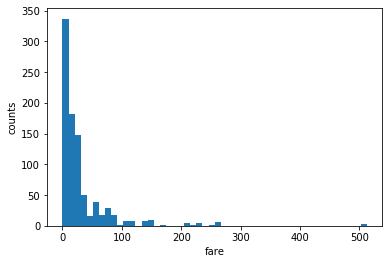

In [36]:
# Plot histogram of fares
plt.figure()

# Histogram of last review date for unavailable properties
plt.hist(train.fare, bins = 50)

plt.xlabel('fare')
plt.ylabel('counts')

plt.show()
plt.close()

Very heavily skew-right, as expected. Is the fare of 512 an outlier?

In [40]:
# 10 highest fares
train.sort_values(by = ['fare'], ascending = False).head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
258,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
737,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
679,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
88,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
27,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
341,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1
438,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,0
311,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
742,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
118,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0


They are outliers in that they are exceptional, but they are not errors.

### cabin

In [43]:
train.cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: cabin, dtype: object

687 missing values. Can it still be useful in this case?

In [47]:
train[~train.cabin.isna()].sort_values(by = ['cabin'])

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
583,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,0
475,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0
556,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1
284,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,0
599,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1
630,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
867,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,0
647,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,1
209,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,1
185,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,0


In [56]:
# What classes occur for each cabin letter?
cabin_not_na = train[~train.cabin.isna()]
cabin_not_na['cabin'] = cabin_not_na.cabin.replace('[^A-Z]', '', regex = True)
cabin_not_na.groupby('cabin').pclass.unique()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cabin
A             [1]
B             [1]
BB            [1]
BBB           [1]
BBBB          [1]
C             [1]
CC            [1]
CCC           [1]
D          [2, 1]
DD            [1]
E       [1, 2, 3]
F          [2, 3]
FE            [3]
FG            [3]
G             [3]
T             [1]
Name: pclass, dtype: object

There is clearly correlation between cabin and class

In [61]:
cabin_not_na[cabin_not_na.cabin == 'D' ]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
21,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D,S,1
52,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D,C,1
102,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D,S,0
124,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D,S,0
136,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D,S,1
215,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D,C,1
218,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D,C,1
248,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D,S,1
275,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D,S,1
292,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C,0


In [62]:
cabin_not_na[cabin_not_na.cabin == 'E' ]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,0
92,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E,S,0
123,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E,S,1
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E,S,1
262,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E,S,0
303,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E,Q,1
309,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E,C,1
319,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E,C,1
337,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E,C,1
356,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E,S,1


I expect that there's a high correlation between cabin being known and class.

### embarked

In [65]:
train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [104]:
percentage_counts(train.embarked)

S    72.3
C    18.9
Q     8.6
Name: embarked, dtype: float64

### survived

In [66]:
train.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [105]:
percentage_counts(train.survived)

0    61.6
1    38.4
Name: survived, dtype: float64

## Summary

We have the following possible features:

- pclass
    - Categorical: ordinal
    - Values: 1 (24%), 2 (21%), 3 (55%)
    - No missing values
    
- name
    - String
    - All values unique & no missing values
    - Format: \*surname\*, \*title\*. \*forenames\* \(\*maiden name?\*\)
    - Ideas:
        1. Use title as feature
        2. Use to group families

- sex
    - Categorical: nominal
    - Values: male (65%), female (35%)
    - No missing values
    
- age
    - Numerical: continuous
    - 177 values (20%) are missing
    - Values: 0.5 - 80
    - Mean = 30, skew-right, with spike near 0

- sibsp
    - Numerical: discrete
    - Values: 0 (68%), 1 (24%), 2 (3%),..., 8
    - Idea: use to group families?
    
- parch
    - Numerical: discrete
    - Values: 0 (76%), 1 (13%), 2 (9%),..., 6
    - Idea: use to group families?
    
- ticket
    - Mixed alpha-numeric
    - No missing values
    - 681 unique values, same tickets have same price
    - Value counts: 547 (61%) have unique ticket, up to 7 on same ticket
    - Format: 3 main types;
        - 6 or 7 digit no. (431 or 48%), first digit is class, all 7 digit tickets are 3rd class
        - < 6 digits (230 or 26%), either 5 (131), 4 (97), or 3 (2) digits, first digit isn't class
        - mixed letter number (230 or 26%), starts with letters + punctuation, then numbers as above. Letters are inconsistent in format, but there are obvious (hard to interpret) patterns.
    - Ideas:
        - Are fares per ticket or per person? Answer this by comparing fares for 6 digit tickets with similar numbers, but different numbers on the same ticket.
        - Is there correlation between ticket and cabin and could this be used to fill in missing information?
        - Could strip letters away from front of tickets to get all tickets as numbers
        - Use tickets to group parties?

- fare
    - Numeric: continuous
    - Values: 4.0125 - 512
    - Missing values:
        - 15 passengers have fare == 0
        - All are male, many missing ages, only 4 passengers with ticket = LINE, almost all died
    - Data very heavily skew-right
    - Value of 512 isn't an error, but is around double next highest ticket price
    - Ideas:
        - Are passengers that died more likely to have missing information?

- cabin
    - Alpha-numeric
    - 204 (23%) values exist
    - 147 unique values
    - Format: \[A-G\]\d\d (or a few of these separated by spaces - some exceptions)
    - Cabin letter correlates with class
    - Ideas:
        - Use cabins to group parties?
        - Extract cabin letter as categorical (ordinal) variable
 
- embarked
    - Categorical: nominal
    - No missing values
    - Values: S (644 or 72%), C (168 or 19%), Q (77 or 9%)

- survived
    - Binary
    - Values: 0 (549 or 62%), 1 (342 or 38%)